<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout1_PartB_Univariate_Analysis_of_Response_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #1 Part B: Univariate Analysis of a Response Variable - Inference


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 1B.1

Consider the following Crater Impact study that was done here at Winona State Univeristy.  This study investigated the effect of certain variables on the size of an impact crater. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Diameter of crater (cm)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Hight from which projectile was dropped</li>
          <li>Projectile Type (glass, steel, or wood ball)</li>
          <li>Sand Type (course, fine)</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1-969XxPtKCcG9MeX4NMRfkTUTaMoj8cY"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)


YouTube: [Impact Craters](https://www.youtube.com/results?search_query=worlds+biggest+impact+craters)


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [2]:
#@title Readin Data

# Reading data in using read.csv via Base 
ImpactCrater <- read.csv("http://www.StatsClass.org/stat360/Datasets/ImpactCrater.csv")

The **head()** function can be used to see the first few lines of the dataset.  Similarly, the tail() function can be used to see the last few lines of a dataset.

In [ ]:
#@title View the first few rows of data
head(ImpactCrater)

## Basic Summary Statistics

In [3]:
#@title Getting several statistics

(ImpactCrater 
  %>% summarize(
                  Avg_Diameter = mean(Diameter),
                  Stdev_Diameter = sd(Diameter),
                  n_Diameter = n(),
                  Min_Diameter = min(Diameter),
                  Max_Diameter = max(Diameter)
                
               )
)

Avg_Diameter,Stdev_Diameter,n_Diameter,Min_Diameter,Max_Diameter
<dbl>,<dbl>,<int>,<dbl>,<dbl>
6.675694,1.724657,144,3.25,11


## Inferential Methods

First, consider a plot of the original data.

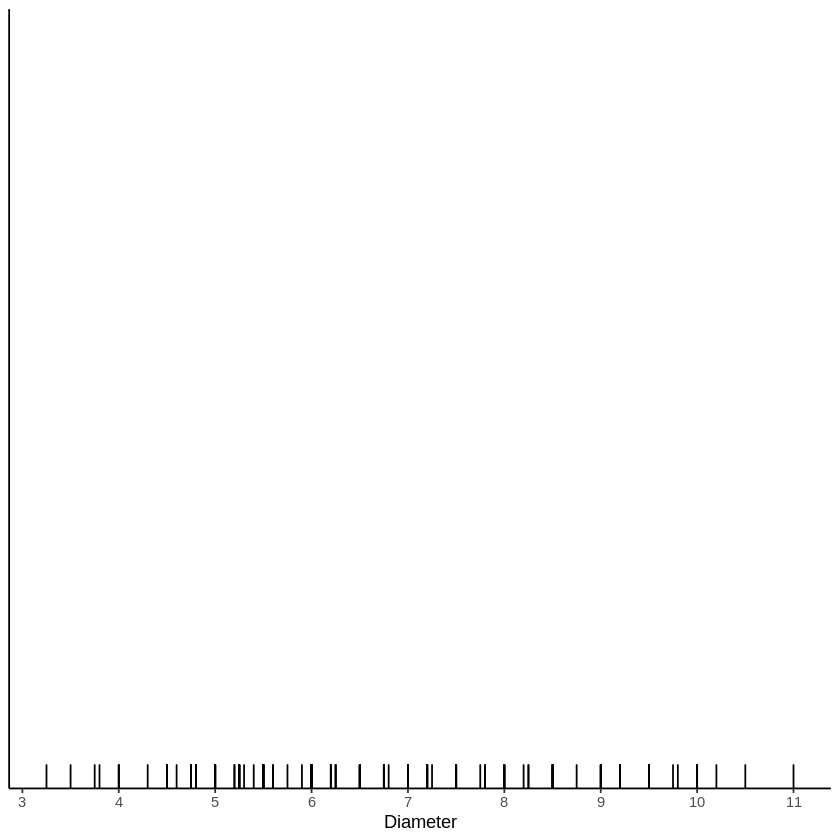

In [36]:
#@title Rug Plot of Diameter
ggplot(data=ImpactCrater, aes(x=Diameter)) + 
  geom_rug() + 
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) +
  labs(x="Diameter") +
  theme_classic()

Here, inference will be made about the population mean, i.e. $\mu$.  Let us consider the value of the sample mean.

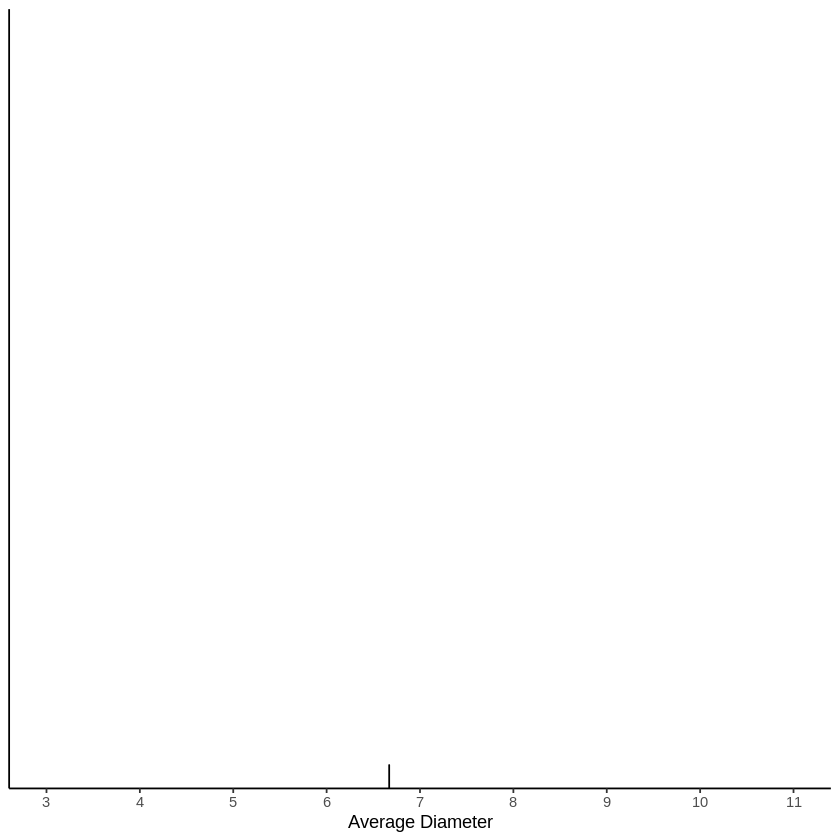

In [38]:
#@title Rug Plot of Sample Mean

AvgDiameter <- data.frame(Avg_Diameter = c(6.67))
ggplot(data=AvgDiameter, aes(x=Avg_Diameter)) + 
  geom_rug() + 
  scale_x_continuous(limits=c(3,11),breaks=c(3,4,5,6,7,8,9,10,11) ) +
  labs(x="Average Diameter") +
  theme_classic()

A comparison of the individual data value and the average diameter.



<p align='center'><img src="https://drive.google.com/uc?export=view&id=1gmZMS8fgTe521ELBgCqGI7glrDUmABXC" width="75%" height="75%"></img></p>

Next, consider the concept of taking *repeated sampling* which would allow us to understand how the sample mean will vary from sample-to-sample.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1P37_4ekGPiXPgnO9asfCk4TCpNHF4bRI" width="50%" height="50%"></img></p>

The following code will allow us to take repeated samples in using the dplyr package.

In [28]:
AvgDiameterRepeated <- data.frame(ResampleID = 1:100) %>% 
    group_by(ResampleID) %>% 
    mutate(Avg_Diameter = mean(sample(ImpactCrater$Diameter, replace = TRUE)))

Next, check to see the data.frame was created properly.

In [20]:
ls()

[1] "AvgDiameter"         "AvgDiameterRepeated" "ImpactCrater"

Taking a look at the outcomes from the repeated samples.

In [29]:
head(AvgDiameterRepeated)

ResampleID,Avg_Diameter
<int>,<dbl>
1,6.622222
2,6.630208
3,6.411458
4,6.439236
5,6.625000
6,6.808681


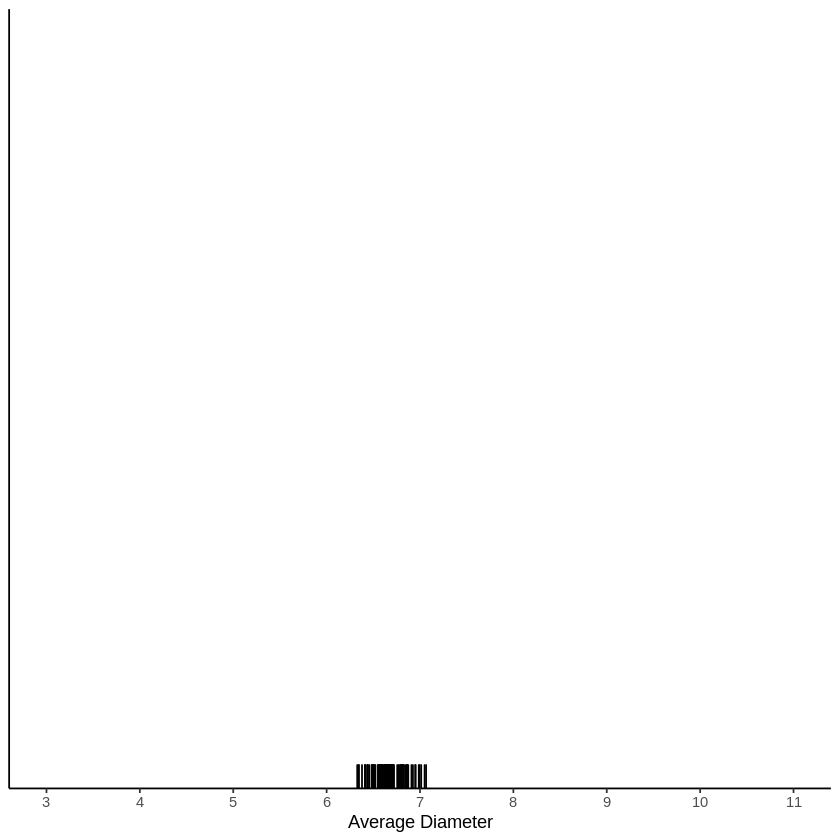

In [33]:
ggplot(data=AvgDiameterRepeated, aes(x=Avg_Diameter)) + 
  geom_rug() + 
  scale_x_continuous(limits=c(3,11),breaks=c(3,4,5,6,7,8,9,10,11) ) +
  labs(x="Average Diameter") +
  theme_classic()

Comparing the individual data values to the repeated sample values.



<p align='center'><img src="https://drive.google.com/uc?export=view&id=1GAkVKfUghFAtsX0i210V3sy1CZfDgwx1" width="75%" height="75%"></img></p>

A 95% *confidence interval* tries to identify the *middle 95% * of these repeated sample means.


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1aN7nC3uD0iCwprizqZ7GP50XOkMso1W9" width="75%" height="75%"></img></p>

Getting the percentiles using from the repeated sample means.

In [32]:
#@title 95% CI via Repeated Sampling
(AvgDiameterRepeated 
  %>% ungroup()  #Removes group_by from ResampleID 
  %>% summarise(
                enframe(
                          quantile(Avg_Diameter, c(0.025,0.975)), "Percentile", "Diameter")
                       )
)

Percentile,Diameter
<chr>,<dbl>
2.5%,6.360955
97.5%,7.005095


## Theory Based Approach

$$
\bar{x} - \left( t_{df=(n-1)}*\frac{s}{\sqrt{n}} \right) < \mu < \bar{x} + \left( t_{df=(n-1)}*\frac{s}{\sqrt{n}} \right)
$$

In [35]:
qt(0.975,df=143)

[1] 1.976692

$$ 6.68 - \left(1.98 *\frac{1.72}{\sqrt{144}} \right) < \mu < 6.68 + \left(1.98 *\frac{1.72}{\sqrt{144}} \right) $$

In [34]:
t.test(ImpactCrater$Diameter)


	One Sample t-test

data:  ImpactCrater$Diameter
t = 46.449, df = 143, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.391602 6.959787
sample estimates:
mean of x 
 6.675694 
